# Results of UNET Super-Resolution Experiments

Importing packages:

In [2]:
from PIL import Image, ImageStat
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from scipy.ndimage.filters import gaussian_filter
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
import glob 
import random
import numpy as np
import os
import re
import cv2
import argparse
import pandas as pd
import math
import torch  
import torch.nn.functional as F 

Create the data sets with results:

In [3]:
# validation set for all 5 n-folds, Data set 4.001

# PSNR
val_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_psnr_0.csv')
val_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_psnr_1.csv')
val_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_psnr_2.csv')
val_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_psnr_3.csv')
val_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_psnr_4.csv')

# SSIM
val_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_ssim_0.csv')
val_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_ssim_1.csv')
val_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_ssim_2.csv')
val_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_ssim_3.csv')
val_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_ssim_4.csv')

# SSSIM
val_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_sssim_0.csv')
val_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_sssim_1.csv')
val_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_sssim_2.csv')
val_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_sssim_3.csv')
val_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/val_results_sssim_4.csv')


In [4]:
# crop the data frames
val_results_psnr_0 = val_results_psnr_0.iloc[:100,1:11]
val_results_psnr_1 = val_results_psnr_1.iloc[:100,1:11]
val_results_psnr_2 = val_results_psnr_2.iloc[:100,1:11]
val_results_psnr_3 = val_results_psnr_3.iloc[:100,1:11]
val_results_psnr_4 = val_results_psnr_4.iloc[:100,1:11]

val_results_ssim_0 = val_results_ssim_0.iloc[:100,1:11]
val_results_ssim_1 = val_results_ssim_1.iloc[:100,1:11]
val_results_ssim_2 = val_results_ssim_2.iloc[:100,1:11]
val_results_ssim_3 = val_results_ssim_3.iloc[:100,1:11]
val_results_ssim_4 = val_results_ssim_4.iloc[:100,1:11]

val_results_sssim_0 = val_results_sssim_0.iloc[:100,1:11]
val_results_sssim_1 = val_results_sssim_1.iloc[:100,1:11]
val_results_sssim_2 = val_results_sssim_2.iloc[:100,1:11]
val_results_sssim_3 = val_results_sssim_3.iloc[:100,1:11]
val_results_sssim_4 = val_results_sssim_4.iloc[:100,1:11]



In [5]:
# test set for all folds

# PSNR
test_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_psnr_0.csv')
test_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_psnr_1.csv')
test_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_psnr_2.csv')
test_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_psnr_3.csv')
test_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_psnr_4.csv')

# SSIM
test_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_ssim_0.csv')
test_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_ssim_1.csv')
test_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_ssim_2.csv')
test_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_ssim_3.csv')
test_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_ssim_4.csv')

# SSSIM 
test_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_sssim_0.csv')
test_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_sssim_1.csv')
test_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_sssim_2.csv')
test_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_sssim_3.csv')
test_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/test_results_sssim_4.csv')



In [6]:
# crop the data frames
test_results_psnr_0 = test_results_psnr_0.iloc[:251,1:11]
test_results_psnr_1 = test_results_psnr_1.iloc[:251,1:11]
test_results_psnr_2 = test_results_psnr_2.iloc[:251,1:11]
test_results_psnr_3 = test_results_psnr_3.iloc[:251,1:11]
test_results_psnr_4 = test_results_psnr_4.iloc[:251,1:11]

test_results_ssim_0 = test_results_ssim_0.iloc[:251,1:11]
test_results_ssim_1 = test_results_ssim_1.iloc[:251,1:11]
test_results_ssim_2 = test_results_ssim_2.iloc[:251,1:11]
test_results_ssim_3 = test_results_ssim_3.iloc[:251,1:11]
test_results_ssim_4 = test_results_ssim_4.iloc[:251,1:11]

test_results_sssim_0 = test_results_sssim_0.iloc[:251,1:11]
test_results_sssim_1 = test_results_sssim_1.iloc[:251,1:11]
test_results_sssim_2 = test_results_sssim_2.iloc[:251,1:11]
test_results_sssim_3 = test_results_sssim_3.iloc[:251,1:11]
test_results_sssim_4 = test_results_sssim_4.iloc[:251,1:11]


In [7]:
# train set for all folds

# PSNR
train_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_psnr_0.csv')
train_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_psnr_1.csv')
train_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_psnr_2.csv')
train_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_psnr_3.csv')
train_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_psnr_4.csv')

# SSIM
train_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_ssim_0.csv')
train_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_ssim_1.csv')
train_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_ssim_2.csv')
train_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_ssim_3.csv')
train_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_ssim_4.csv')

# SSSIM
train_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_sssim_0.csv')
train_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_sssim_1.csv')
train_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_sssim_2.csv')
train_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_sssim_3.csv')
train_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results/train_results_sssim_4.csv')



In [8]:
# crop the data frames
train_results_psnr_0 = train_results_psnr_0.iloc[:901,1:11]
train_results_psnr_1 = train_results_psnr_1.iloc[:901,1:11]
train_results_psnr_2 = train_results_psnr_2.iloc[:901,1:11]
train_results_psnr_3 = train_results_psnr_3.iloc[:901,1:11]
train_results_psnr_4 = train_results_psnr_4.iloc[:901,1:11]

train_results_ssim_0 = train_results_ssim_0.iloc[:901,1:11]
train_results_ssim_1 = train_results_ssim_1.iloc[:901,1:11]
train_results_ssim_2 = train_results_ssim_2.iloc[:901,1:11]
train_results_ssim_3 = train_results_ssim_3.iloc[:901,1:11]
train_results_ssim_4 = train_results_ssim_4.iloc[:901,1:11]

train_results_sssim_0 = train_results_sssim_0.iloc[:901,1:11]
train_results_sssim_1 = train_results_sssim_1.iloc[:901,1:11]
train_results_sssim_2 = train_results_sssim_2.iloc[:901,1:11]
train_results_sssim_3 = train_results_sssim_3.iloc[:901,1:11]
train_results_sssim_4 = train_results_sssim_4.iloc[:901,1:11]



## Visualize Validation data sets

### SSIM / SSSIM Scores for all n-folds separately

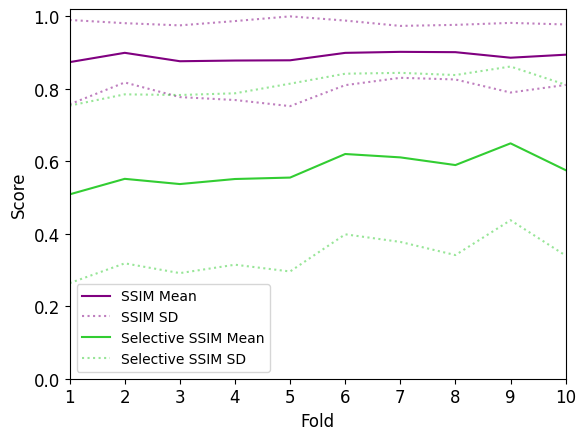

In [9]:
ssim_means = val_results_ssim_0.mean()
ssim_stds = val_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_0.mean()
sssim_stds = val_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_val_0.png")

In [10]:
print(ssim_means,ssim_stds)

0    0.873726
1    0.899406
2    0.876180
3    0.878097
4    0.878774
5    0.899290
6    0.902082
7    0.901195
8    0.885906
9    0.894251
dtype: float64 0    0.116308
1    0.081781
2    0.098970
3    0.108950
4    0.126495
5    0.089122
6    0.071609
7    0.075348
8    0.096079
9    0.083457
dtype: float64


In [11]:
print(sssim_means,sssim_stds)

0    0.508805
1    0.551627
2    0.537215
3    0.551163
4    0.555114
5    0.620159
6    0.610844
7    0.589637
8    0.649569
9    0.575632
dtype: float64 0    0.244890
1    0.233176
2    0.245775
3    0.236520
4    0.259137
5    0.221613
6    0.233289
7    0.248437
8    0.212044
9    0.235736
dtype: float64


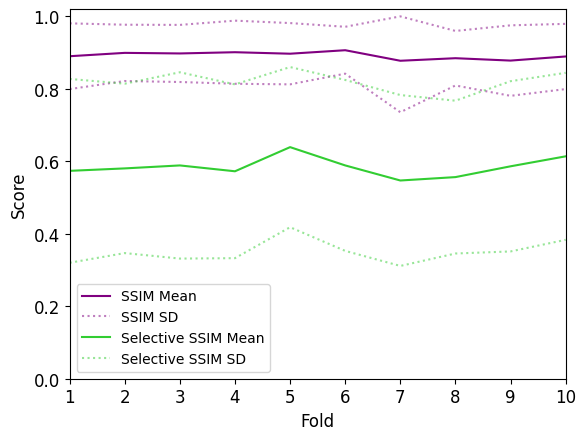

In [13]:
ssim_means = val_results_ssim_1.mean()
ssim_stds = val_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_1.mean()
sssim_stds = val_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_val_1.png")

In [14]:
print(ssim_means,ssim_stds)

0    0.890010
1    0.899270
2    0.897663
3    0.901076
4    0.896947
5    0.906571
6    0.877495
7    0.884549
8    0.877986
9    0.889326
dtype: float64 0    0.090732
1    0.077687
2    0.078798
3    0.087093
4    0.084568
5    0.064676
6    0.142068
7    0.075235
8    0.097275
9    0.089995
dtype: float64


In [15]:
print(sssim_means,ssim_stds)

0    0.573680
1    0.580442
2    0.588635
3    0.572499
4    0.639111
5    0.588649
6    0.547058
7    0.556414
8    0.586200
9    0.613744
dtype: float64 0    0.090732
1    0.077687
2    0.078798
3    0.087093
4    0.084568
5    0.064676
6    0.142068
7    0.075235
8    0.097275
9    0.089995
dtype: float64


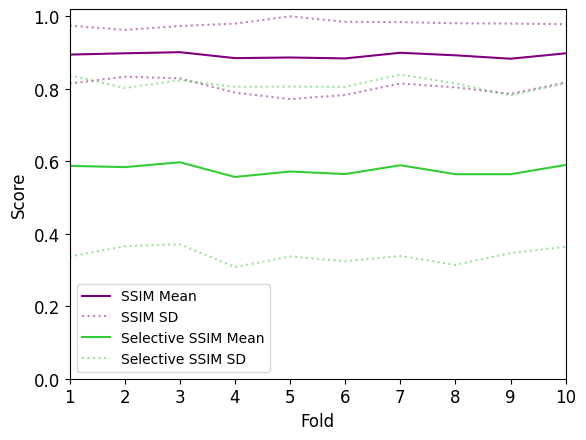

In [16]:
ssim_means = val_results_ssim_2.mean()
ssim_stds = val_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_2.mean()
sssim_stds = val_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_val_2.png")

In [17]:
print(ssim_means,ssim_stds)

0    0.894541
1    0.898088
2    0.901174
3    0.884772
4    0.886496
5    0.884001
6    0.899523
7    0.892549
8    0.883101
9    0.897998
dtype: float64 0    0.080055
1    0.064576
2    0.072178
3    0.095207
4    0.114856
5    0.100879
6    0.084617
7    0.088516
8    0.097009
9    0.080345
dtype: float64


In [18]:
print(sssim_means,sssim_stds )

0    0.587415
1    0.583948
2    0.597368
3    0.556846
4    0.571858
5    0.564825
6    0.589126
7    0.564462
8    0.564406
9    0.589915
dtype: float64 0    0.250238
1    0.218321
2    0.226143
3    0.248657
4    0.234559
5    0.240574
6    0.250322
7    0.250350
8    0.217640
9    0.225503
dtype: float64


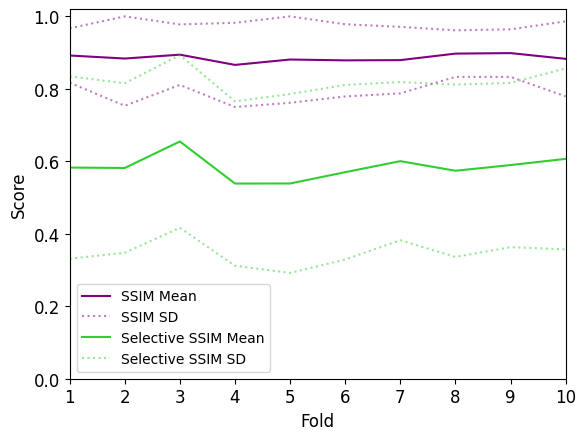

In [19]:
ssim_means = val_results_ssim_3.mean()
ssim_stds = val_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_3.mean()
sssim_stds = val_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_val_3.png")

In [20]:
print(ssim_means, ssim_stds)

0    0.892012
1    0.883630
2    0.894311
3    0.866076
4    0.880896
5    0.878589
6    0.879252
7    0.897233
8    0.898620
9    0.882781
dtype: float64 0    0.074959
1    0.130295
2    0.083455
3    0.116225
4    0.119438
5    0.099567
6    0.091840
7    0.064240
8    0.065631
9    0.103533
dtype: float64


In [21]:
print(sssim_means, sssim_stds )

0    0.582757
1    0.581635
2    0.654749
3    0.538634
4    0.538790
5    0.569992
6    0.600463
7    0.573930
8    0.589666
9    0.606684
dtype: float64 0    0.251637
1    0.233867
2    0.238186
3    0.226857
4    0.246860
5    0.240810
6    0.218363
7    0.237758
8    0.226679
9    0.249647
dtype: float64


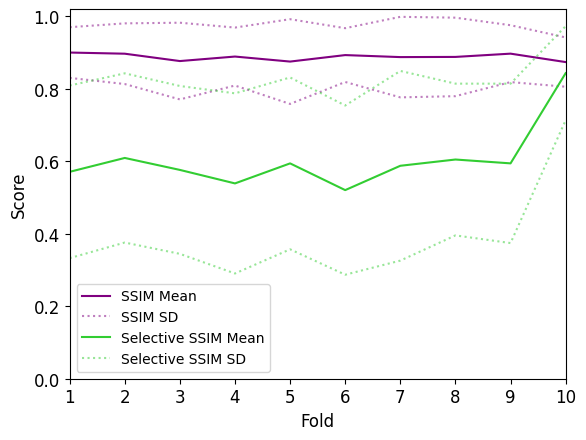

In [22]:
ssim_means = val_results_ssim_4.mean()
ssim_stds = val_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_4.mean()
sssim_stds = val_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_val_4.png")

In [23]:
print(ssim_means, ssim_stds)

0    0.900169
1    0.896976
2    0.876662
3    0.889096
4    0.875259
5    0.893154
6    0.887595
7    0.888096
8    0.897107
9    0.873841
dtype: float64 0    0.069932
1    0.083720
2    0.105838
3    0.080008
4    0.116929
5    0.074235
6    0.111120
7    0.108318
8    0.078482
9    0.067999
dtype: float64


In [24]:
print(sssim_means,sssim_stds )

0    0.570983
1    0.609285
2    0.576258
3    0.539007
4    0.594279
5    0.520511
6    0.587672
7    0.604938
8    0.594321
9    0.843248
dtype: float64 0    0.238173
1    0.233494
2    0.231615
3    0.248577
4    0.237106
5    0.233456
6    0.261721
7    0.209409
8    0.219947
9    0.129836
dtype: float64


### PSNR results for all n-folds separately

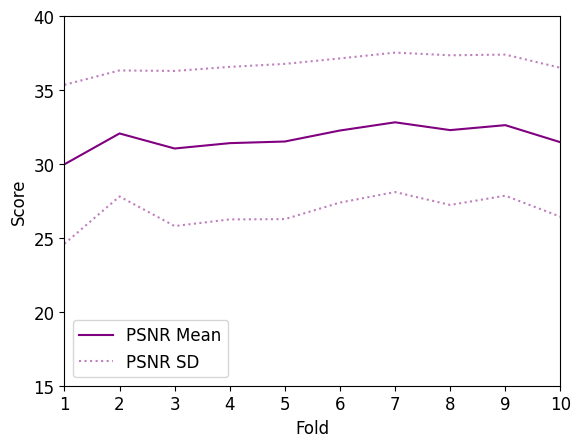

In [25]:
psnr_means = val_results_psnr_0.mean()
psnr_stds = val_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results/psnr_val_0.png")

In [26]:
print(psnr_means, psnr_stds)

0    29.975922
1    32.063706
2    31.045820
3    31.408070
4    31.518676
5    32.262922
6    32.817044
7    32.289874
8    32.625155
9    31.470478
dtype: float64 0    5.374634
1    4.261967
2    5.245683
3    5.159169
4    5.249872
5    4.875614
6    4.715812
7    5.061663
8    4.772030
9    5.035447
dtype: float64


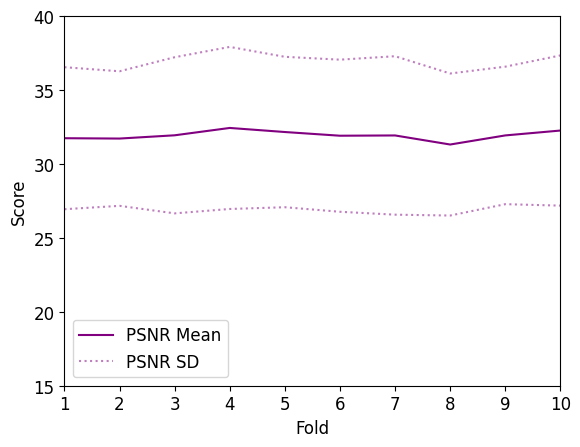

In [27]:
psnr_means = val_results_psnr_1.mean()
psnr_stds = val_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results/psnr_val_1.png")

In [28]:
print(psnr_means, psnr_stds)

0    31.741479
1    31.718636
2    31.938563
3    32.436255
4    32.160534
5    31.910384
6    31.928636
7    31.315237
8    31.930803
9    32.260921
dtype: float64 0    4.803010
1    4.551058
2    5.280476
3    5.481247
4    5.086955
5    5.144215
6    5.358708
7    4.803473
8    4.650767
9    5.078899
dtype: float64


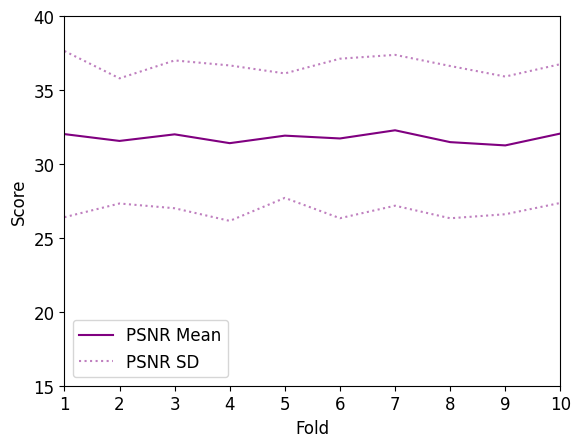

In [35]:
psnr_means = val_results_psnr_2.mean()
psnr_stds = val_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results/psnr_val_2.png")

In [30]:
print(psnr_means, psnr_stds)

0    32.019307
1    31.558148
2    32.003566
3    31.406769
4    31.915262
5    31.724942
6    32.278074
7    31.476480
8    31.255495
9    32.057509
dtype: float64 0    5.621558
1    4.232399
2    4.999387
3    5.257260
4    4.209221
5    5.394676
6    5.101177
7    5.149963
8    4.656228
9    4.693354
dtype: float64


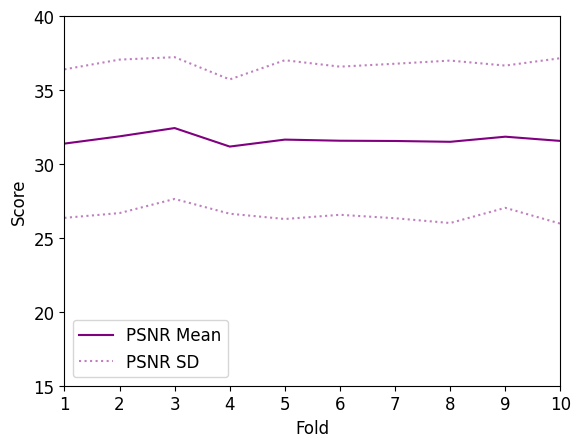

In [31]:
psnr_means = val_results_psnr_3.mean()
psnr_stds = val_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results/psnr_val_3.png")

In [32]:
print(psnr_means, psnr_stds)

0    31.377002
1    31.867825
2    32.428346
3    31.176353
4    31.647308
5    31.571795
6    31.554311
7    31.498895
8    31.844271
9    31.558165
dtype: float64 0    5.022173
1    5.190408
2    4.794690
3    4.541774
4    5.370246
5    5.010018
6    5.224899
7    5.494008
8    4.811105
9    5.595629
dtype: float64


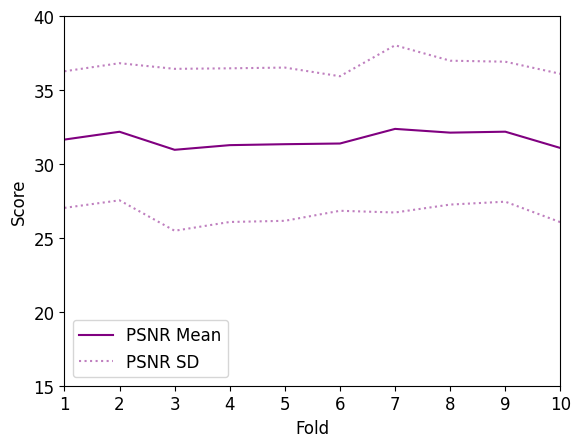

In [33]:
psnr_means = val_results_psnr_4.mean()
psnr_stds = val_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results/psnr_val_4.png")

In [34]:
print(psnr_means, psnr_stds)

0    31.649434
1    32.178241
2    30.957965
3    31.272837
4    31.336925
5    31.383150
6    32.372553
7    32.118929
8    32.182704
9    31.080103
dtype: float64 0    4.619585
1    4.637518
2    5.475869
3    5.196742
4    5.182774
5    4.550013
6    5.655127
7    4.865764
8    4.734181
9    5.018168
dtype: float64


## Visualize Test Set

### SSIM / SSSIM Comparison for each n-fold

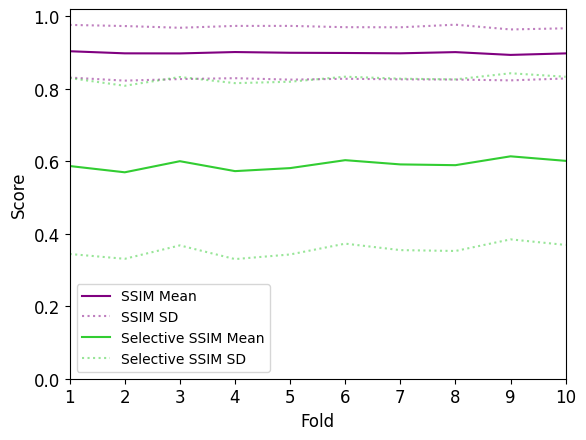

In [39]:
ssim_means = test_results_ssim_0.mean()
ssim_stds = test_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_0.mean()
sssim_stds = test_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_test_0.png")

In [37]:
print(ssim_means, ssim_stds)

0    0.903781
1    0.897981
2    0.897750
3    0.901545
4    0.899557
5    0.898967
6    0.898047
7    0.901347
8    0.893643
9    0.897834
dtype: float64 0    0.072656
1    0.075322
2    0.070807
3    0.072139
4    0.074153
5    0.071189
6    0.071815
7    0.075707
8    0.070259
9    0.069221
dtype: float64


In [38]:
print(sssim_means,sssim_stds)

0    0.586985
1    0.569679
2    0.600314
3    0.572922
4    0.581254
5    0.603145
6    0.591453
7    0.589334
8    0.613778
9    0.601261
dtype: float64 0    0.242750
1    0.238774
2    0.232377
3    0.242794
4    0.238345
5    0.230382
6    0.236540
7    0.236802
8    0.229188
9    0.232086
dtype: float64


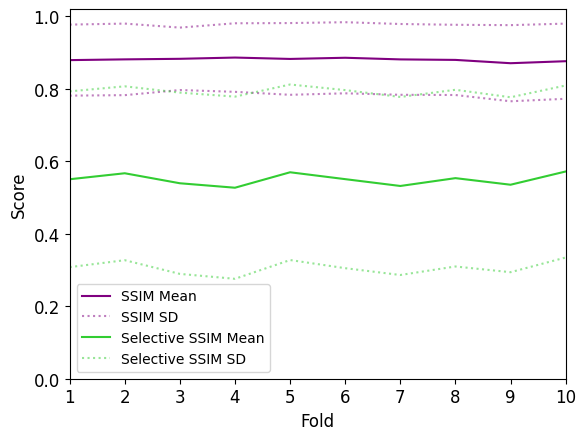

In [40]:
ssim_means = test_results_ssim_1.mean()
ssim_stds = test_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_1.mean()
sssim_stds = test_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_test_1.png")

In [41]:
print(ssim_means, ssim_stds)

0    0.879260
1    0.881327
2    0.882871
3    0.886333
4    0.882524
5    0.885772
6    0.881253
7    0.879856
8    0.870726
9    0.876256
dtype: float64 0    0.097999
1    0.098747
2    0.086152
3    0.094611
4    0.098984
5    0.098117
6    0.097695
7    0.096892
8    0.105048
9    0.103733
dtype: float64


In [42]:
print(sssim_means,sssim_stds)

0    0.550487
1    0.567021
2    0.539415
3    0.527110
4    0.569753
5    0.550767
6    0.531935
7    0.553551
8    0.535361
9    0.571892
dtype: float64 0    0.242557
1    0.239926
2    0.250144
3    0.251377
4    0.242211
5    0.245734
6    0.245657
7    0.243829
8    0.241368
9    0.237359
dtype: float64


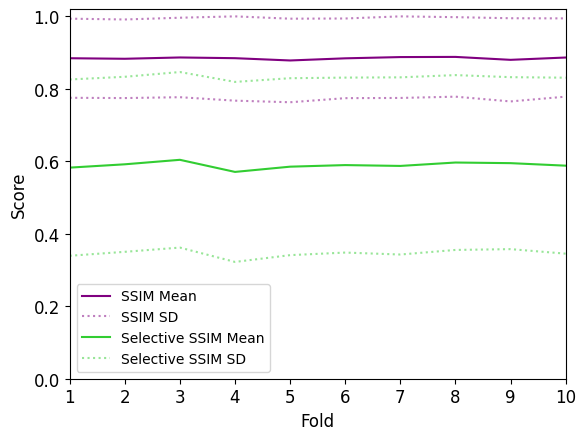

In [43]:
ssim_means = test_results_ssim_2.mean()
ssim_stds = test_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_2.mean()
sssim_stds = test_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_test_2.png")

In [44]:
print(ssim_means, ssim_stds)

0    0.884469
1    0.882980
2    0.886588
3    0.884594
4    0.878298
5    0.884215
6    0.887660
7    0.888119
8    0.880049
9    0.886436
dtype: float64 0    0.109188
1    0.108431
2    0.109677
3    0.117201
4    0.115311
5    0.109926
6    0.112794
7    0.109704
8    0.114794
9    0.108018
dtype: float64


In [45]:
print(sssim_means,sssim_stds)

0    0.582577
1    0.591736
2    0.604139
3    0.570739
4    0.585198
5    0.589568
6    0.587252
7    0.596645
8    0.594929
9    0.587973
dtype: float64 0    0.243276
1    0.241523
2    0.242246
3    0.248410
4    0.244134
5    0.241426
6    0.244473
7    0.241252
8    0.237283
9    0.242808
dtype: float64


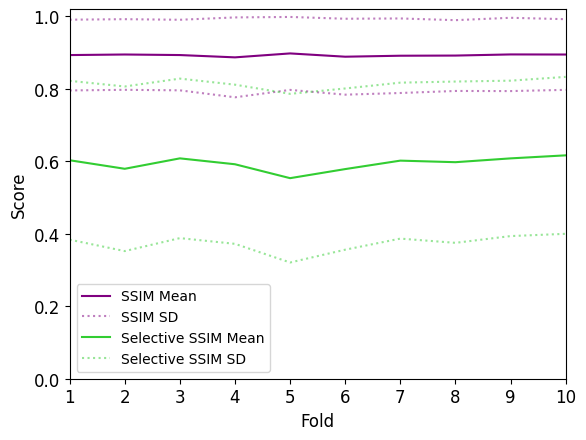

In [46]:
ssim_means = test_results_ssim_3.mean()
ssim_stds = test_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_3.mean()
sssim_stds = test_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_test_3.png")

In [47]:
print(ssim_means, ssim_stds)

0    0.893197
1    0.894771
2    0.893248
3    0.886883
4    0.897740
5    0.888684
6    0.891386
7    0.891830
8    0.894952
9    0.894700
dtype: float64 0    0.097616
1    0.097480
2    0.097363
3    0.110237
4    0.100655
5    0.104766
6    0.102880
7    0.097696
8    0.101139
9    0.097510
dtype: float64


In [48]:
print(sssim_means,sssim_stds)

0    0.602924
1    0.579368
2    0.608137
3    0.591861
4    0.553489
5    0.578543
6    0.601868
7    0.597574
8    0.608091
9    0.616448
dtype: float64 0    0.219159
1    0.227158
2    0.220080
3    0.219619
4    0.232715
5    0.222465
6    0.215192
7    0.222564
8    0.214449
9    0.216537
dtype: float64


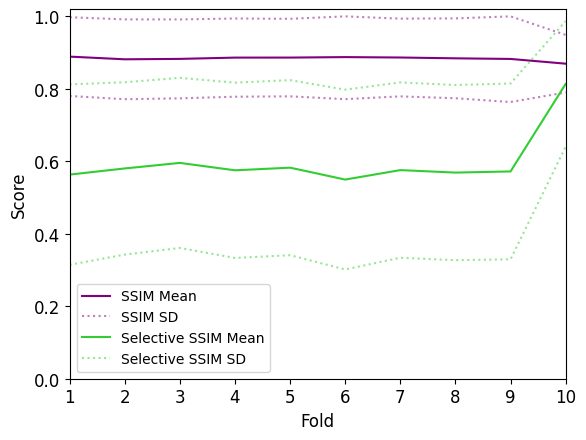

In [49]:
ssim_means = test_results_ssim_4.mean()
ssim_stds = test_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_4.mean()
sssim_stds = test_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_test_4.png")

In [50]:
print(ssim_means, ssim_stds)

0    0.888936
1    0.881522
2    0.882660
3    0.886197
4    0.886274
5    0.887585
6    0.886473
7    0.884224
8    0.882522
9    0.869462
dtype: float64 0    0.108646
1    0.110153
2    0.108894
3    0.107944
4    0.106988
5    0.116049
6    0.107249
7    0.110193
8    0.118929
9    0.079444
dtype: float64


In [51]:
print(sssim_means,sssim_stds)

0    0.563373
1    0.580320
2    0.595607
3    0.575158
4    0.582452
5    0.549616
6    0.575736
7    0.568859
8    0.572047
9    0.813633
dtype: float64 0    0.248917
1    0.237762
2    0.234709
3    0.241898
4    0.241556
5    0.248164
6    0.241918
7    0.241737
8    0.242589
9    0.173349
dtype: float64


### SSIM / SSSIM Comparison for all n-folds

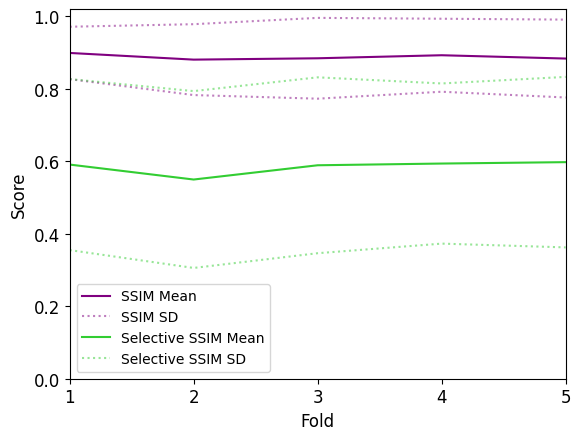

In [52]:
ssim_means_0 = test_results_ssim_0.mean()
ssim_stds_0 = test_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = test_results_ssim_1.mean()
ssim_stds_1 = test_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = test_results_ssim_2.mean()
ssim_stds_2 = test_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = test_results_ssim_3.mean()
ssim_stds_3 = test_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = test_results_ssim_4.mean()
ssim_stds_4 = test_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = test_results_sssim_0.mean()
sssim_stds_0 = test_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = test_results_sssim_1.mean()
sssim_stds_1 = test_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = test_results_sssim_2.mean()
sssim_stds_2 = test_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = test_results_sssim_3.mean()
sssim_stds_3 = test_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = test_results_sssim_4.mean()
sssim_stds_4 = test_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1



n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_test_mean_all_folds.png")

In [53]:
print(ssim_means, ssim_stds)

[0.8990452984414727, 0.8806178935198672, 0.8843407636975862, 0.8927391708490859, 0.8835855139679168] [0.07232666245216807, 0.09779765151338357, 0.11150420326615085, 0.10073420875808115, 0.10744890577642222]


In [54]:
print(sssim_means, sssim_stds)

[0.5910124101694599, 0.5497294621594042, 0.5890754948500025, 0.5938303476385031, 0.5976801537674856] [0.2360037246849082, 0.2440162504715521, 0.24268308268017855, 0.22099378659936378, 0.23525983254340005]


### SSSIM/SSIM Comparison over all n-folds


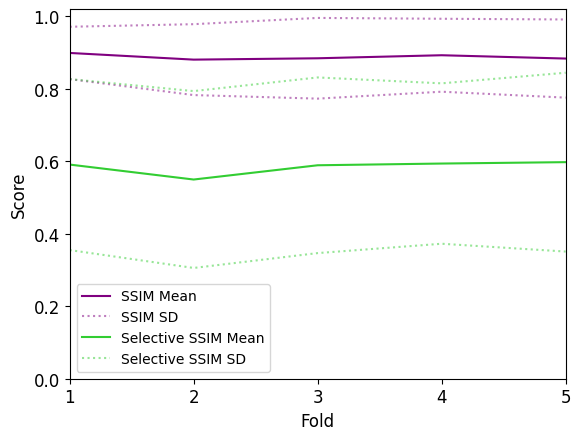

In [9]:
fold_0_test_ssim = np.array(test_results_ssim_0).reshape(-1,1)
fold_1_test_ssim = np.array(test_results_ssim_1).reshape(-1,1)
fold_2_test_ssim = np.array(test_results_ssim_2).reshape(-1,1)
fold_3_test_ssim = np.array(test_results_ssim_3).reshape(-1,1)
fold_4_test_ssim = np.array(test_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_test_ssim)
ssim_std_0 = np.std(fold_0_test_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_test_ssim)
ssim_std_1 = np.std(fold_1_test_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_test_ssim)
ssim_std_2 = np.std(fold_2_test_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_test_ssim)
ssim_std_3 = np.std(fold_3_test_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_test_ssim)
ssim_std_4 = np.std(fold_4_test_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_test_sssim = np.array(test_results_sssim_0).reshape(-1,1)
fold_1_test_sssim = np.array(test_results_sssim_1).reshape(-1,1)
fold_2_test_sssim = np.array(test_results_sssim_2).reshape(-1,1)
fold_3_test_sssim = np.array(test_results_sssim_3).reshape(-1,1)
fold_4_test_sssim = np.array(test_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_test_sssim)
sssim_std_0 = np.std(fold_0_test_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_test_sssim)
sssim_std_1 = np.std(fold_1_test_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_test_sssim)
sssim_std_2 = np.std(fold_2_test_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_test_sssim)
sssim_std_3 = np.std(fold_3_test_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_test_sssim)
sssim_std_4 = np.std(fold_4_test_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_test_mean_std_all_folds.png")

In [10]:
print(ssim_means, ssim_stds)

[0.8990452984414727, 0.880617893519867, 0.8843407636975862, 0.8927391708490858, 0.8835855139679167] [0.07225873681580623, 0.09781963552496623, 0.11136571622394181, 0.1006594637404008, 0.10782888676587334]


In [11]:
print(sssim_means, sssim_stds)

[0.5910124101694599, 0.5497294621594042, 0.5890754948500024, 0.5938303476385031, 0.5976801537674855] [0.23594995005309466, 0.24404624760930602, 0.24236350580030466, 0.2213308031837646, 0.24673919303181652]


### Stability Score Calculation

In [12]:
stability_score = 1 - 2*np.mean(sssim_stds)
print(stability_score)

0.5238281201286854


### Distribution of SSIM/SSSIM Scores

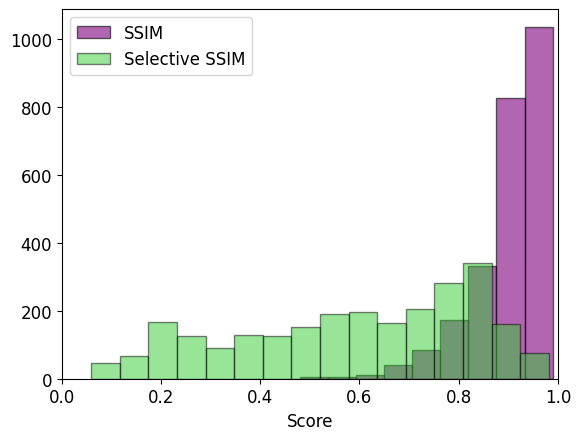

In [68]:
# n fold 0

plt.figure()
plt.hist(fold_0_test_ssim, bins=9, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_test_0.png")

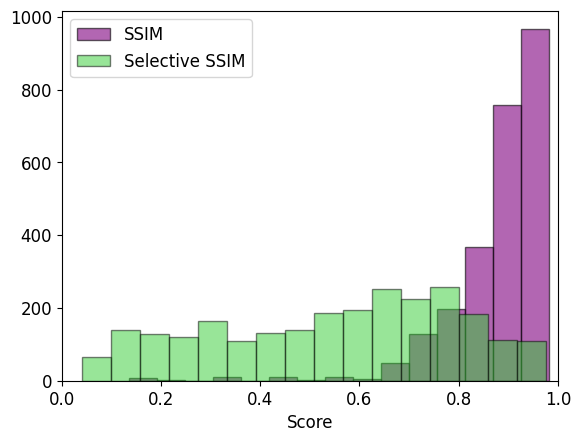

In [66]:
# n fold 1

plt.figure()
plt.hist(fold_1_test_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_test_1.png")

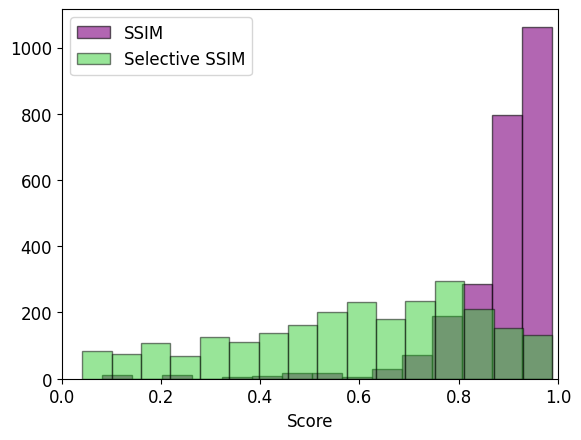

In [65]:
# n fold 2

plt.figure()
plt.hist(fold_2_test_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_test_2.png")

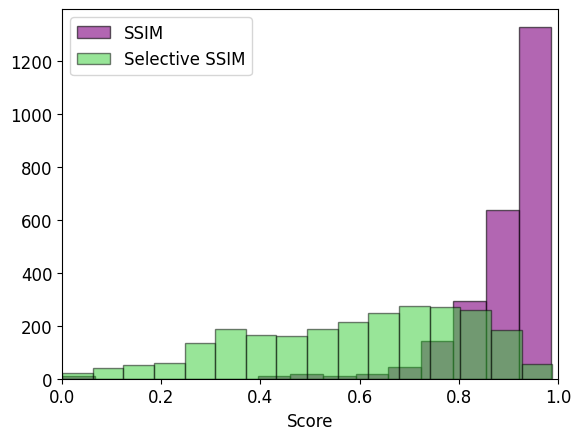

In [64]:
# n fold 3

plt.figure()
plt.hist(fold_3_test_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_test_3.png")

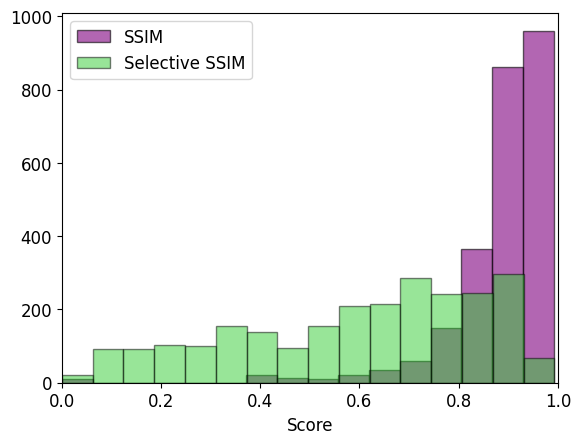

In [69]:
# n fold 4

plt.figure()
plt.hist(fold_4_test_ssim, bins=16, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_test_4.png")

### PSNR Comparison for each n-fold

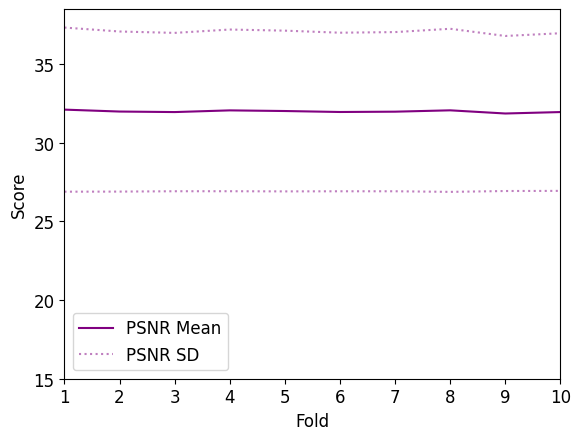

In [70]:
psnr_means = test_results_psnr_0.mean()
psnr_stds = test_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)
plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_test_0.png")

In [71]:
print(psnr_means, psnr_stds)

0    32.109950
1    31.987840
2    31.954484
3    32.061872
4    32.021121
5    31.959232
6    31.979393
7    32.065171
8    31.863609
9    31.955277
dtype: float64 0    5.218047
1    5.089770
2    5.034237
3    5.140362
4    5.110027
5    5.041261
6    5.060406
7    5.184901
8    4.929252
9    5.011544
dtype: float64


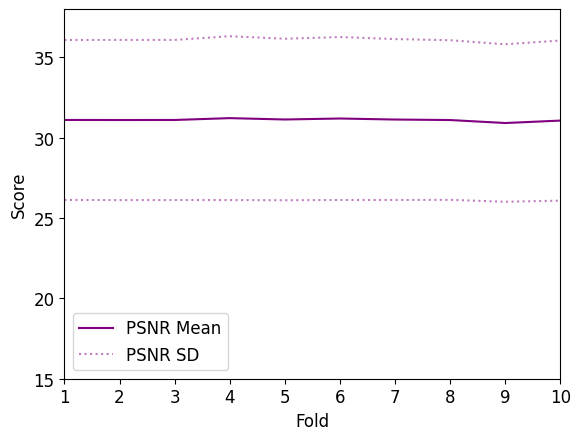

In [72]:
psnr_means = test_results_psnr_1.mean()
psnr_stds = test_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38)
plt.savefig("unet_results/psnr_test_1.png")

In [73]:
print(psnr_means, psnr_stds)

0    31.102762
1    31.099149
2    31.101346
3    31.216369
4    31.131867
5    31.193086
6    31.129158
7    31.097584
8    30.911788
9    31.064446
dtype: float64 0    4.976760
1    4.985259
2    4.982250
3    5.097247
4    5.025520
5    5.070451
6    5.006413
7    4.966838
8    4.900074
9    4.982200
dtype: float64


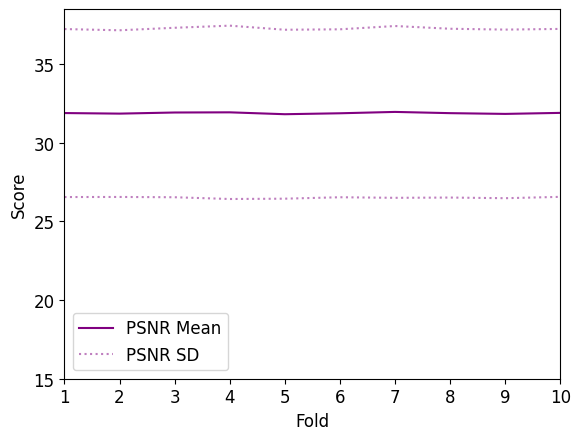

In [74]:
psnr_means = test_results_psnr_2.mean()
psnr_stds = test_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_test_2.png")

In [75]:
print(psnr_means, psnr_stds)

0    31.891801
1    31.855750
2    31.926485
3    31.937724
4    31.818056
5    31.877619
6    31.964198
7    31.885390
8    31.837979
9    31.903051
dtype: float64 0    5.340480
1    5.298913
2    5.387610
3    5.510892
4    5.370516
5    5.339002
6    5.461749
7    5.366082
8    5.360083
9    5.338777
dtype: float64


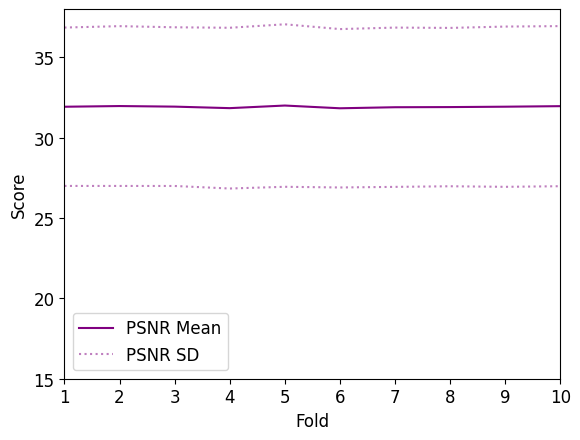

In [76]:
psnr_means = test_results_psnr_3.mean()
psnr_stds = test_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38)
plt.savefig("unet_results/psnr_test_3.png")

In [77]:
print(psnr_means, psnr_stds)

0    31.925231
1    31.968334
2    31.932025
3    31.837953
4    31.999912
5    31.829761
6    31.894624
7    31.904049
8    31.927850
9    31.961602
dtype: float64 0    4.927530
1    4.972079
2    4.937628
3    5.001641
4    5.056134
5    4.928250
6    4.956209
7    4.926852
8    4.986519
9    4.981486
dtype: float64


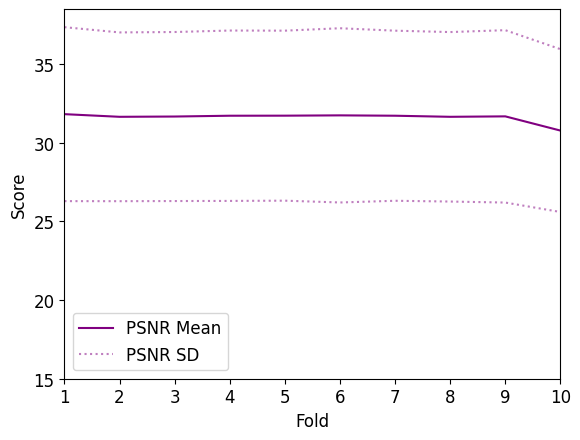

In [78]:
psnr_means = test_results_psnr_4.mean()
psnr_stds = test_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_test_4.png")

In [79]:
print(psnr_means, psnr_stds)

0    31.821852
1    31.653239
2    31.670862
3    31.721694
4    31.725472
5    31.744984
6    31.721889
7    31.653229
8    31.681358
9    30.777955
dtype: float64 0    5.530261
1    5.365308
2    5.373769
3    5.416748
4    5.404849
5    5.539210
6    5.407496
7    5.387761
8    5.479932
9    5.175622
dtype: float64


### PSNR vals for all n-folds combined

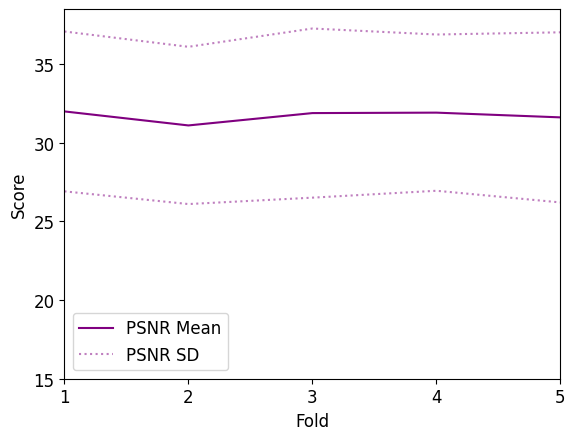

In [80]:
psnr_means_0 = test_results_psnr_0.mean()
psnr_stds_0 = test_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = test_results_psnr_1.mean()
psnr_stds_1 = test_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = test_results_psnr_2.mean()
psnr_stds_2 = test_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = test_results_psnr_3.mean()
psnr_stds_3 = test_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = test_results_psnr_4.mean()
psnr_stds_4 = test_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_test_mean_all_folds.png")

In [81]:
print(psnr_means, psnr_stds)

[31.995795076060222, 31.104755357077078, 31.88980545645677, 31.918134119018315, 31.617253312841456] [5.081980537453765, 4.999301092197557, 5.377410537432156, 4.967432834951407, 5.408095598554711]


### PSNR means and stds over all n-folds

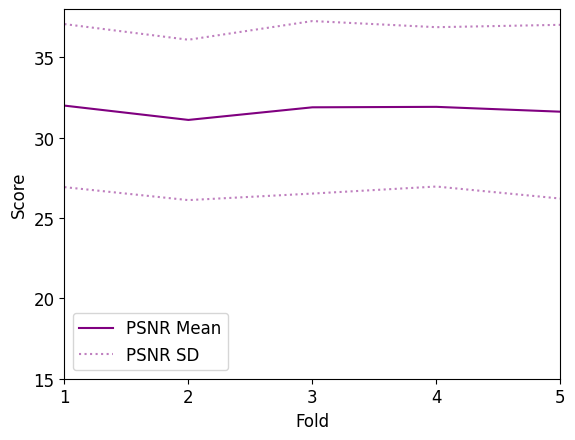

In [13]:
fold_0_test_psnr = np.array(test_results_psnr_0).reshape(-1,1)
fold_1_test_psnr = np.array(test_results_psnr_1).reshape(-1,1)
fold_2_test_psnr = np.array(test_results_psnr_2).reshape(-1,1)
fold_3_test_psnr = np.array(test_results_psnr_3).reshape(-1,1)
fold_4_test_psnr = np.array(test_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_test_psnr)
psnr_std_0 = np.std(fold_0_test_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_test_psnr)
psnr_std_1 = np.std(fold_1_test_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_test_psnr)
psnr_std_2 = np.std(fold_2_test_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_test_psnr)
psnr_std_3 = np.std(fold_3_test_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_test_psnr)
psnr_std_4 = np.std(fold_4_test_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=38)
plt.savefig("unet_results/psnr_test_mean_std_all_folds.png")

In [14]:
print(psnr_means, psnr_stds)

[31.99579507606023, 31.104755357077075, 31.889805456456774, 31.91813411901832, 31.617253312841452] [5.07294242636096, 4.990214411774985, 5.367194470894221, 4.957948970138403, 5.405644548852711]


### Distribution of PSNR Values

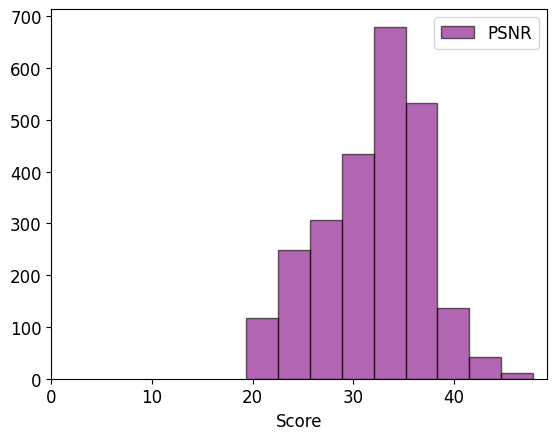

In [95]:
# n fold 0
plt.figure()
plt.hist(fold_0_test_psnr, bins=9, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_test_0.png")

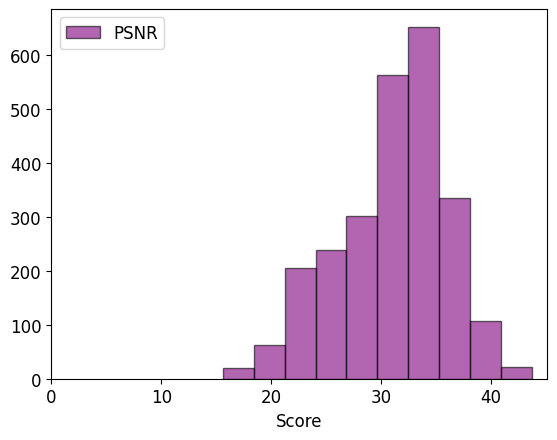

In [93]:
# n fold 1
plt.figure()
plt.hist(fold_1_test_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_test_1.png")

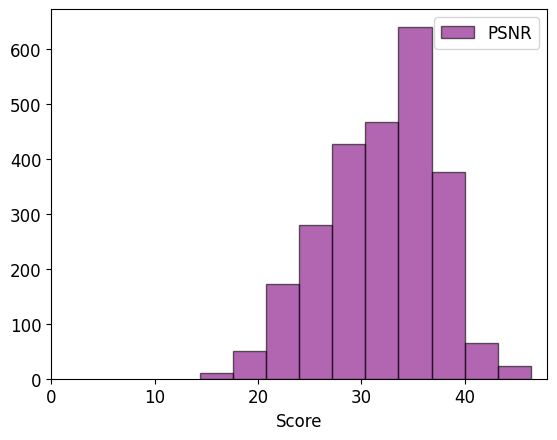

In [92]:
# n fold 2
plt.figure()
plt.hist(fold_2_test_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_test_2.png")

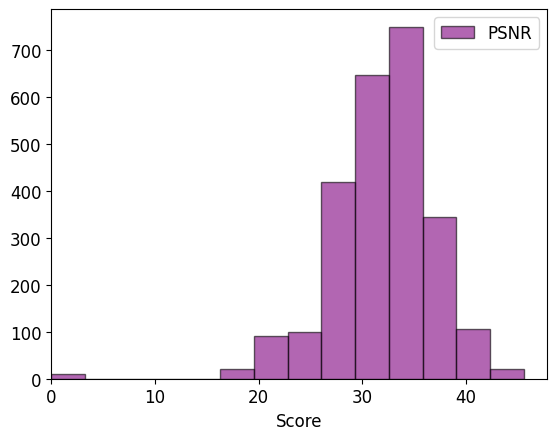

In [96]:
# n fold 3
plt.figure()
plt.hist(fold_3_test_psnr, bins=14, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_test_3.png")

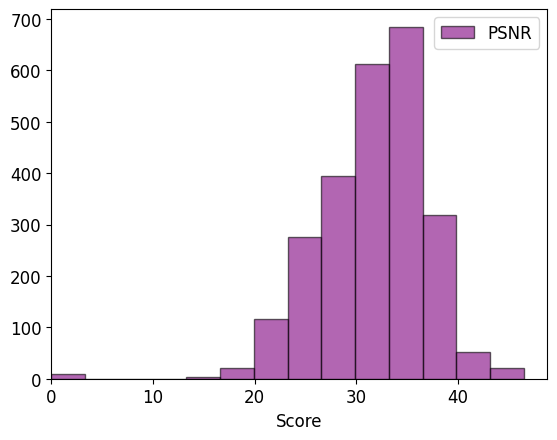

In [90]:
# n fold 4
plt.figure()
plt.hist(fold_4_test_psnr, bins=14, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_test_4.png")

## Visualize Train Set

### Results for each n-fold

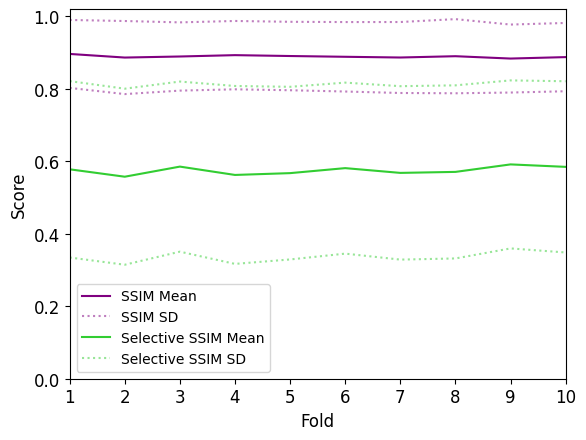

In [98]:
ssim_means = train_results_ssim_0.mean()
ssim_stds = train_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_0.mean()
sssim_stds = train_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_train_0.png")

In [99]:
print(ssim_means, ssim_stds)

0    0.896326
1    0.886338
2    0.889253
3    0.892997
4    0.890569
5    0.888462
6    0.886469
7    0.890064
8    0.883593
9    0.887579
dtype: float64 0    0.093746
1    0.100830
2    0.094170
3    0.094300
4    0.094452
5    0.095833
6    0.097931
7    0.102308
8    0.093806
9    0.094222
dtype: float64


In [100]:
print(sssim_means, sssim_stds)

0    0.577932
1    0.557499
2    0.585377
3    0.562383
4    0.567372
5    0.581184
6    0.568037
7    0.570785
8    0.591458
9    0.584674
dtype: float64 0    0.243391
1    0.242919
2    0.234737
3    0.245490
4    0.238228
5    0.235966
6    0.239289
7    0.238860
8    0.231849
9    0.236292
dtype: float64


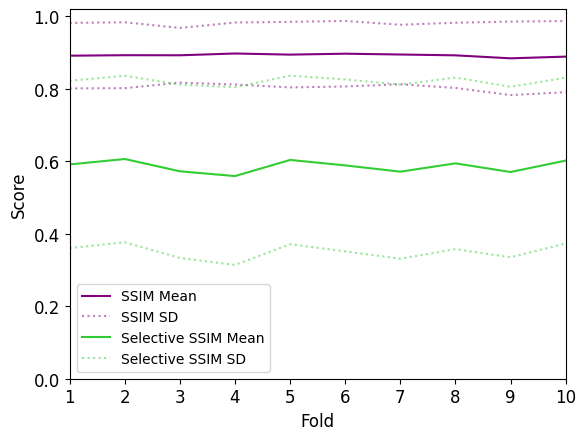

In [101]:
ssim_means = train_results_ssim_1.mean()
ssim_stds = train_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_1.mean()
sssim_stds = train_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_train_1.png")

In [102]:
print(ssim_means, ssim_stds)

0    0.891475
1    0.892834
2    0.892616
3    0.897524
4    0.894428
5    0.896983
6    0.894755
7    0.892457
8    0.884209
9    0.888926
dtype: float64 0    0.090396
1    0.090869
2    0.075490
3    0.085544
4    0.090449
5    0.090414
6    0.082108
7    0.089969
8    0.101468
9    0.098156
dtype: float64


In [103]:
print(sssim_means, sssim_stds)

0    0.591337
1    0.606337
2    0.572480
3    0.559248
4    0.603761
5    0.588730
6    0.571425
7    0.594335
8    0.570443
9    0.601937
dtype: float64 0    0.231017
1    0.229767
2    0.239204
3    0.245263
4    0.232545
5    0.237321
6    0.240240
7    0.236711
8    0.235238
9    0.228743
dtype: float64


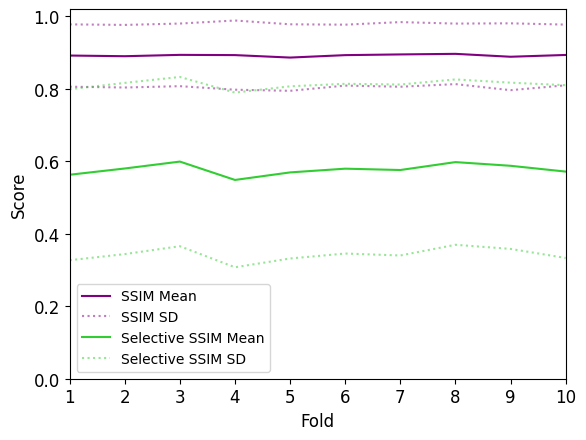

In [104]:
ssim_means = train_results_ssim_2.mean()
ssim_stds = train_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_2.mean()
sssim_stds = train_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_train_2.png")

In [105]:
print(sssim_means, sssim_stds)

0    0.562934
1    0.580189
2    0.599239
3    0.548573
4    0.569396
5    0.579680
6    0.575996
7    0.597807
8    0.587646
9    0.571652
dtype: float64 0    0.235918
1    0.236238
2    0.233547
3    0.241010
4    0.237608
5    0.234186
6    0.235871
7    0.228199
8    0.229394
9    0.238398
dtype: float64


In [106]:
print(ssim_means, ssim_stds)

0    0.891899
1    0.890035
2    0.893762
3    0.893089
4    0.886303
5    0.893020
6    0.894969
7    0.896559
8    0.888543
9    0.893497
dtype: float64 0    0.086003
1    0.086372
2    0.086409
3    0.095467
4    0.091793
5    0.084073
6    0.089207
7    0.083522
8    0.092259
9    0.083777
dtype: float64


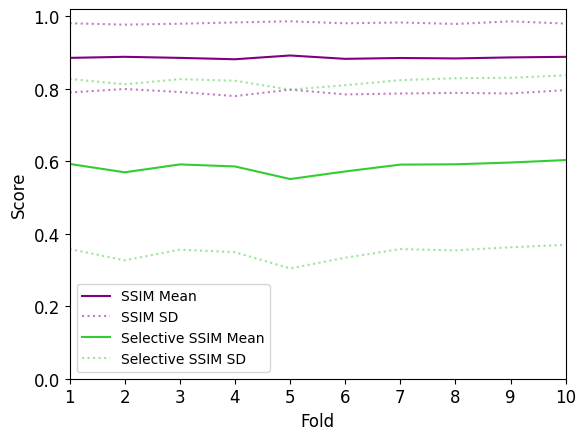

In [110]:
ssim_means = train_results_ssim_3.mean()
ssim_stds = train_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_3.mean()
sssim_stds = train_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_train_3.png")

In [108]:
print(ssim_means, ssim_stds)

0    0.885440
1    0.888366
2    0.885437
3    0.881657
4    0.892047
5    0.882780
6    0.885151
7    0.883923
8    0.886758
9    0.888342
dtype: float64 0    0.095578
1    0.088782
2    0.094238
3    0.101630
4    0.094383
5    0.098099
6    0.098085
7    0.095105
8    0.099523
9    0.091842
dtype: float64


In [109]:
print(sssim_means, sssim_stds)

0    0.592690
1    0.569638
2    0.591443
3    0.585816
4    0.551061
5    0.572035
6    0.590861
7    0.591738
8    0.596633
9    0.603420
dtype: float64 0    0.234594
1    0.242941
2    0.235283
3    0.236532
4    0.246647
5    0.238068
6    0.233146
7    0.237475
8    0.233794
9    0.233802
dtype: float64


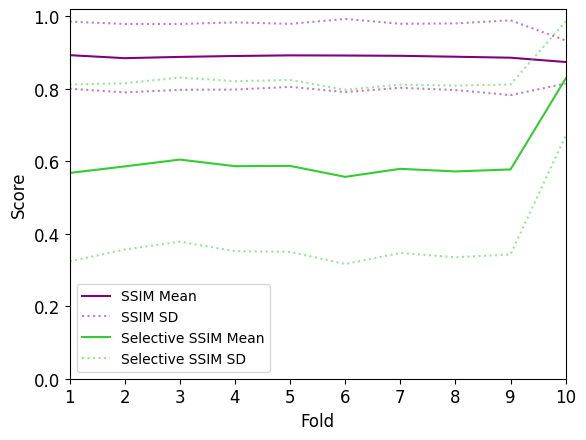

In [111]:
ssim_means = train_results_ssim_4.mean()
ssim_stds = train_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_4.mean()
sssim_stds = train_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_train_4.png")

In [112]:
print(sssim_means, sssim_stds)

0    0.567881
1    0.585963
2    0.604742
3    0.586620
4    0.587313
5    0.557113
6    0.579296
7    0.572021
8    0.577588
9    0.828494
dtype: float64 0    0.244124
1    0.229338
2    0.226521
3    0.234501
4    0.237113
5    0.240455
6    0.232299
7    0.236898
8    0.234633
9    0.157715
dtype: float64


In [113]:
print(ssim_means, ssim_stds)

0    0.892971
1    0.884637
2    0.888146
3    0.890646
4    0.892386
5    0.891956
6    0.891160
7    0.888610
8    0.885921
9    0.874024
dtype: float64 0    0.092590
1    0.094446
2    0.090887
3    0.092688
4    0.086961
5    0.100887
6    0.088404
7    0.091915
8    0.103281
9    0.059411
dtype: float64


### Results for all n-folds combined

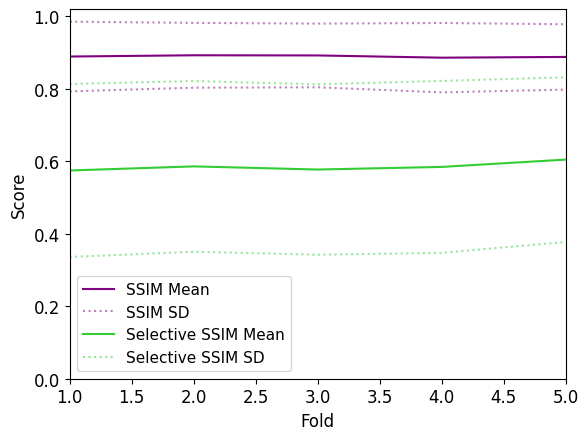

In [114]:
ssim_means_0 = train_results_ssim_0.mean()
ssim_stds_0 = train_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = train_results_ssim_1.mean()
ssim_stds_1 = train_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = train_results_ssim_2.mean()
ssim_stds_2 = train_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = train_results_ssim_3.mean()
ssim_stds_3 = train_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = train_results_ssim_4.mean()
ssim_stds_4 = train_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = train_results_sssim_0.mean()
sssim_stds_0 = train_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = train_results_sssim_1.mean()
sssim_stds_1 = train_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = train_results_sssim_2.mean()
sssim_stds_2 = train_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = train_results_sssim_3.mean()
sssim_stds_3 = train_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = train_results_sssim_4.mean()
sssim_stds_4 = train_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_train_mean_all_folds.png")

In [115]:
print(ssim_means, ssim_stds)

[0.8891649973139449, 0.8926207287123346, 0.8921676100342308, 0.8859902019051218, 0.8880457214283426] [0.09615966955623259, 0.08948626835061355, 0.08788815991062768, 0.0957265860422715, 0.0901472136596608]


In [116]:
print(sssim_means, sssim_stds)

[0.5746701017096555, 0.5860032740622743, 0.5773110326522181, 0.5845335300652088, 0.6047030829928906] [0.23870200456802454, 0.23560484067936832, 0.23503681621043357, 0.23722812292318934, 0.2273596948599216]


### Mean and SD on all n-folds combined

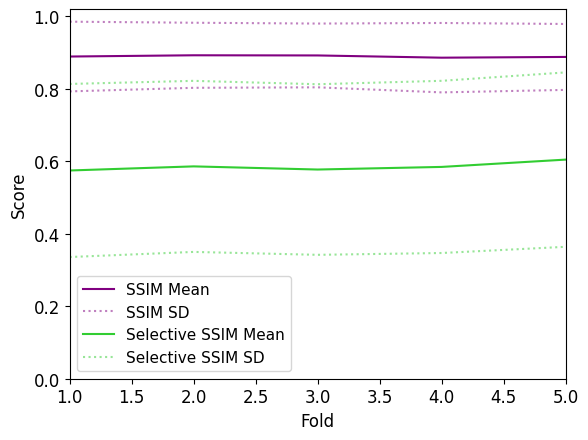

In [15]:
fold_0_train_ssim = np.array(train_results_ssim_0).reshape(-1,1)
fold_1_train_ssim = np.array(train_results_ssim_1).reshape(-1,1)
fold_2_train_ssim = np.array(train_results_ssim_2).reshape(-1,1)
fold_3_train_ssim = np.array(train_results_ssim_3).reshape(-1,1)
fold_4_train_ssim = np.array(train_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_train_ssim)
ssim_std_0 = np.std(fold_0_train_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_train_ssim)
ssim_std_1 = np.std(fold_1_train_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_train_ssim)
ssim_std_2 = np.std(fold_2_train_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_train_ssim)
ssim_std_3 = np.std(fold_3_train_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_train_ssim)
ssim_std_4 = np.std(fold_4_train_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_train_sssim = np.array(train_results_sssim_0).reshape(-1,1)
fold_1_train_sssim = np.array(train_results_sssim_1).reshape(-1,1)
fold_2_train_sssim = np.array(train_results_sssim_2).reshape(-1,1)
fold_3_train_sssim = np.array(train_results_sssim_3).reshape(-1,1)
fold_4_train_sssim = np.array(train_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_train_sssim)
sssim_std_0 = np.std(fold_0_train_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_train_sssim)
sssim_std_1 = np.std(fold_1_train_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_train_sssim)
sssim_std_2 = np.std(fold_2_train_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_train_sssim)
sssim_std_3 = np.std(fold_3_train_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_train_sssim)
sssim_std_4 = np.std(fold_4_train_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results/ssim_train_mean_std_all_folds.png")

In [16]:
print(ssim_means, ssim_stds)

[0.8891649973139448, 0.8926207287123347, 0.8921676100342308, 0.8859902019051217, 0.8880457214283427] [0.09621353926763726, 0.0897856053222326, 0.08797422864351116, 0.0957837484173601, 0.09096253211843044]


In [17]:
print(sssim_means, sssim_stds)

[0.5746701017096556, 0.5860032740622743, 0.5773110326522182, 0.5845335300652089, 0.6047030829928907] [0.2388355251982377, 0.23604342870371361, 0.2353929535752577, 0.23759839677434802, 0.24064470956068273]


### Distribution of SSIM/SSSIM Values

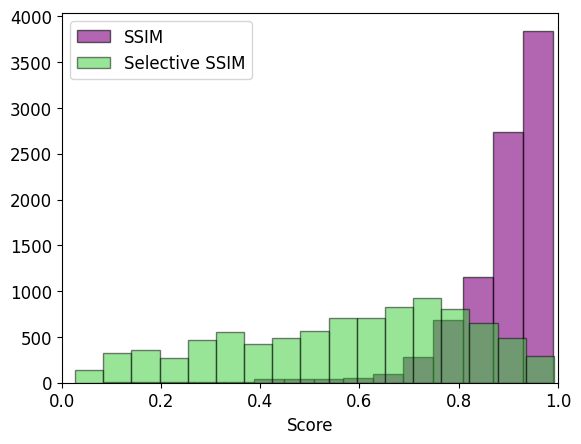

In [129]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_train_0.png")

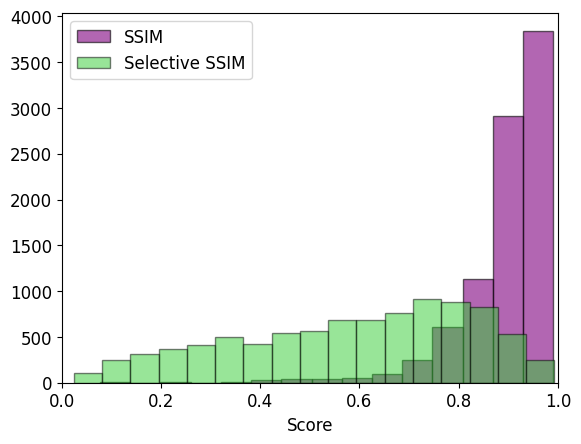

In [128]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_train_1.png")

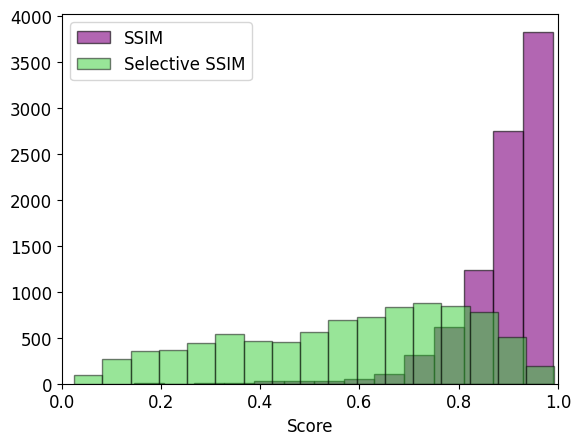

In [127]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_ssim, bins=14, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_train_2.png")

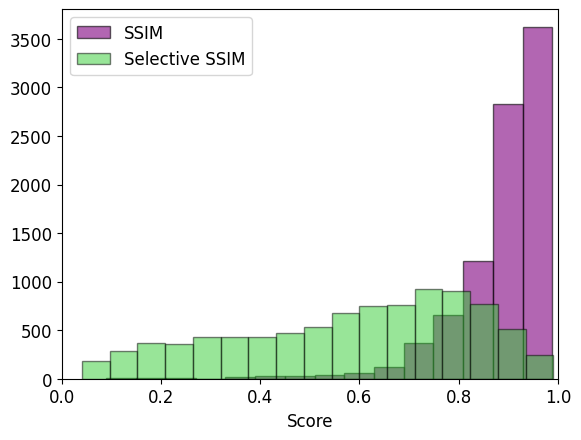

In [126]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_train_3.png")

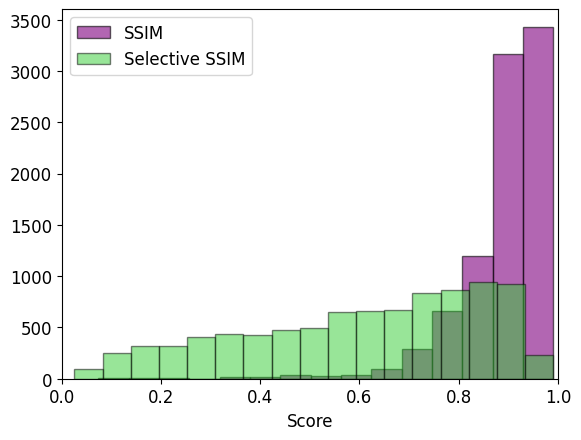

In [125]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results/ssim_distribution_train_4.png")

### PSNR Results for each n-fold

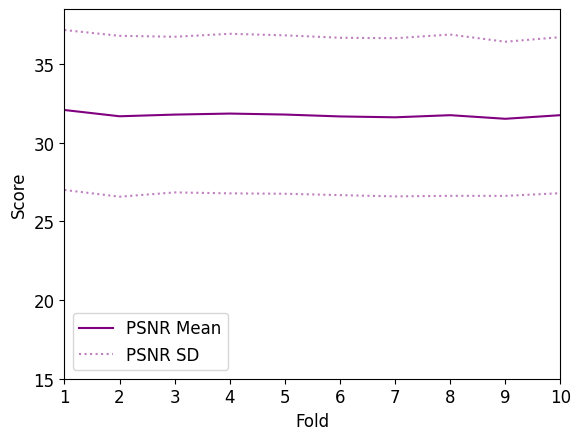

In [130]:
psnr_means = train_results_psnr_0.mean()
psnr_stds = train_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_train_0.png")

In [131]:
print(psnr_means, psnr_stds)

0    32.085957
1    31.687043
2    31.794008
3    31.858781
4    31.797076
5    31.676867
6    31.621434
7    31.756685
8    31.527291
9    31.757275
dtype: float64 0    5.084873
1    5.113712
2    4.948575
3    5.072755
4    5.035921
5    5.002901
6    5.027999
7    5.127951
8    4.899710
9    4.961419
dtype: float64


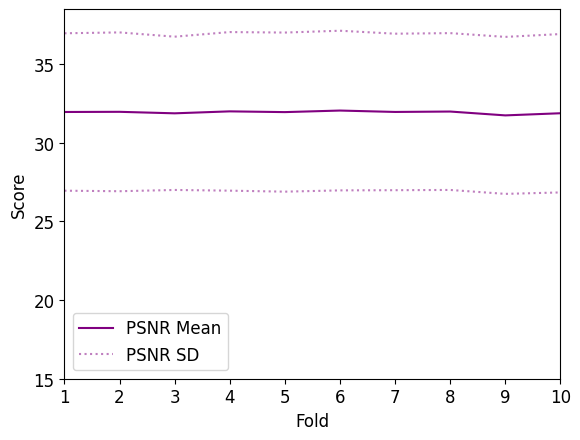

In [132]:
psnr_means = train_results_psnr_1.mean()
psnr_stds = train_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_train_1.png")

In [133]:
print(psnr_means, psnr_stds)

0    31.959642
1    31.970269
2    31.874720
3    31.999189
4    31.951707
5    32.050928
6    31.962177
7    31.988140
8    31.743419
9    31.879443
dtype: float64 0    5.004222
1    5.048861
2    4.872949
3    5.041632
4    5.057859
5    5.075509
6    4.975170
7    4.985791
8    4.990801
9    5.034797
dtype: float64


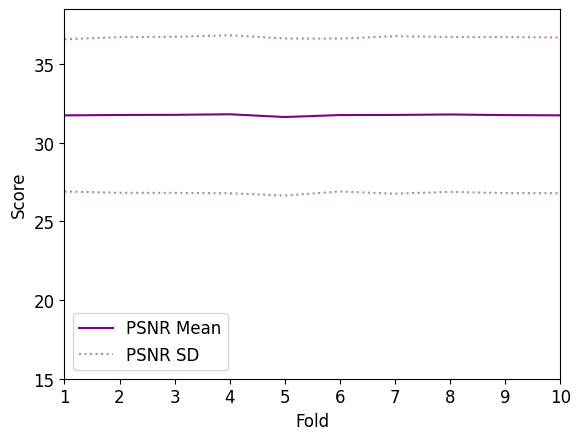

In [134]:
psnr_means = train_results_psnr_2.mean()
psnr_stds = train_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_train_2.png")

In [135]:
print(psnr_means, psnr_stds)

0    31.744365
1    31.770197
2    31.778696
3    31.813938
4    31.638614
5    31.765322
6    31.772309
7    31.801487
8    31.761344
9    31.747174
dtype: float64 0    4.838646
1    4.947595
2    4.963240
3    5.021904
4    4.993398
5    4.859060
6    5.009337
7    4.921914
8    4.958270
9    4.949555
dtype: float64


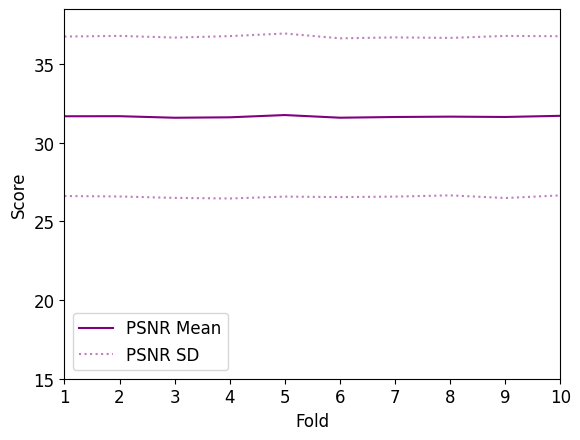

In [136]:
psnr_means = train_results_psnr_3.mean()
psnr_stds = train_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_train_3.png")

In [137]:
print(psnr_means, psnr_stds)

0    31.686943
1    31.692176
2    31.593973
3    31.621196
4    31.764751
5    31.595695
6    31.640962
7    31.663453
8    31.642411
9    31.716380
dtype: float64 0    5.070573
1    5.105385
2    5.096583
3    5.162098
4    5.184643
5    5.047488
6    5.061468
7    5.004998
8    5.153137
9    5.059436
dtype: float64


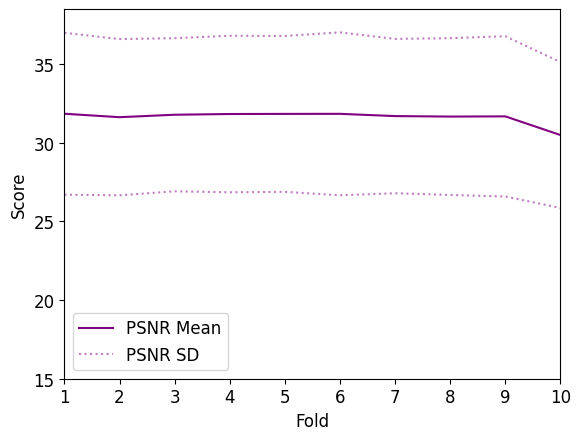

In [138]:
psnr_means = train_results_psnr_4.mean()
psnr_stds = train_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_train_4.png")

In [139]:
print(psnr_means, psnr_stds)

0    31.847427
1    31.628674
2    31.784713
3    31.830728
4    31.838314
5    31.842033
6    31.698776
7    31.668007
8    31.681631
9    30.495379
dtype: float64 0    5.145996
1    4.967163
2    4.866692
3    4.976616
4    4.955784
5    5.178273
6    4.906670
7    4.984316
8    5.094805
9    4.640674
dtype: float64


### PSNR Results for all n-folds combined

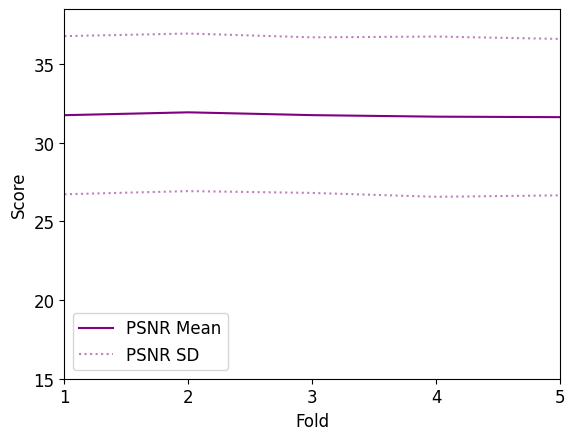

In [140]:
psnr_means_0 = train_results_psnr_0.mean()
psnr_stds_0 = train_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = train_results_psnr_1.mean()
psnr_stds_1 = train_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = train_results_psnr_2.mean()
psnr_stds_2 = train_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = train_results_psnr_3.mean()
psnr_stds_3 = train_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = train_results_psnr_4.mean()
psnr_stds_4 = train_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_train_mean_all_folds.png")

In [141]:
print(psnr_means, psnr_stds)

[31.756241750311567, 31.93796348252302, 31.759344533232827, 31.661794057226736, 31.63156820095707] [5.027581613893107, 5.008759208706738, 4.946291872331807, 5.094580886340543, 4.971698885348059]


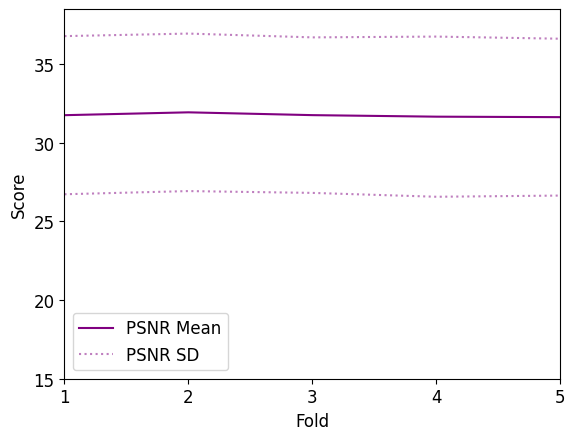

In [142]:
fold_0_train_psnr = np.array(train_results_psnr_0).reshape(-1,1)
fold_1_train_psnr = np.array(train_results_psnr_1).reshape(-1,1)
fold_2_train_psnr = np.array(train_results_psnr_2).reshape(-1,1)
fold_3_train_psnr = np.array(train_results_psnr_3).reshape(-1,1)
fold_4_train_psnr = np.array(train_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_train_psnr)
psnr_std_0 = np.std(fold_0_train_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_train_psnr)
psnr_std_1 = np.std(fold_1_train_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_train_psnr)
psnr_std_2 = np.std(fold_2_train_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_train_psnr)
psnr_std_3 = np.std(fold_3_train_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_train_psnr)
psnr_std_4 = np.std(fold_4_train_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=38.5)
plt.savefig("unet_results/psnr_train_mean_std_all_folds.png")


In [143]:
print(psnr_means, psnr_stds)

[31.75624175031157, 31.93796348252302, 31.759344533232827, 31.661794057226732, 31.63156820095707] [5.0273217548515, 5.006949926841694, 4.944077333070699, 5.092301840687751, 4.986109306046985]


### Distribution of PSNR Values


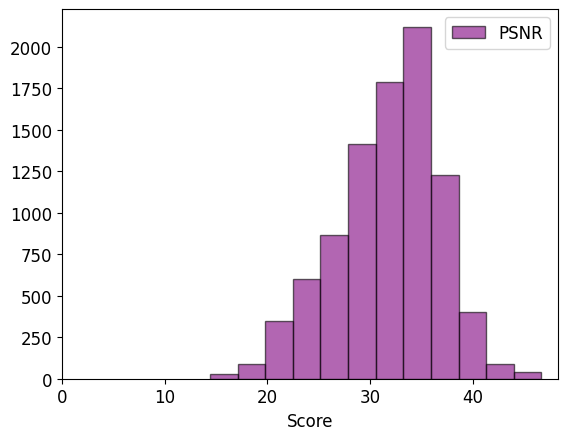

In [144]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_train_0.png")

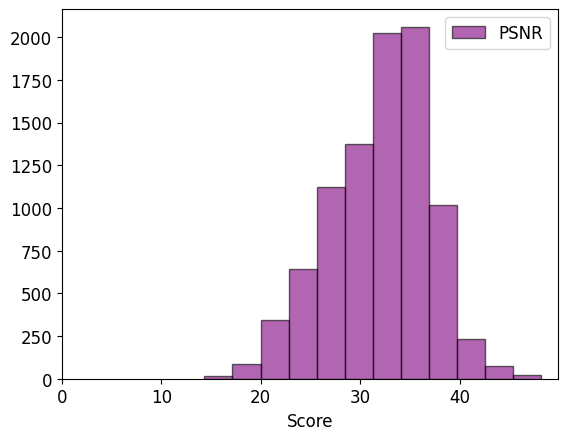

In [145]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_train_1.png")

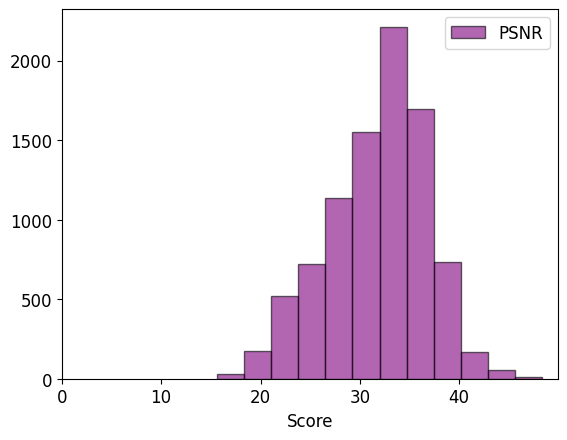

In [146]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_train_2.png")

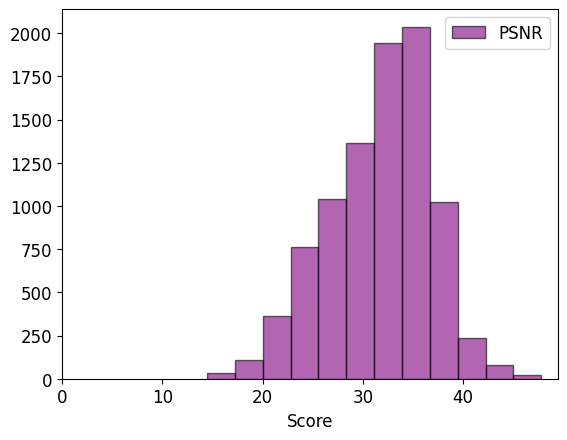

In [147]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_train_3.png")

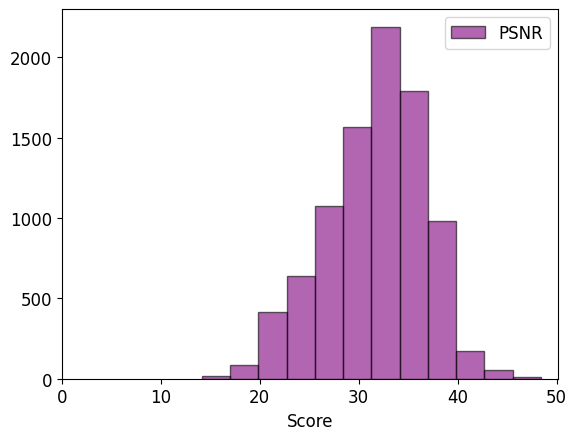

In [148]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results/psnr_distribution_train_4.png")